<a href="https://colab.research.google.com/github/jayoung977/2020DM/blob/master/1202_decisiontree02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision Tree**


In [159]:
from google.colab import drive
drive.mount('/content/drive')   #드라이브 마운트하기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
from sklearn.metrics import accuracy_score #분류 성능 평가
from sklearn.model_selection import train_test_split # train : test = 12 : 2 (문제 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  # 시각화위함
import pandas as pd
import numpy as np
import pydotplus
import os

##1. 데이터 적제

In [161]:
tennis_data = pd.read_csv('/content/drive/My Drive/데이터마이닝/PlayTennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


##2. Feature Encoding

In [21]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny',0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain',2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot',3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild',4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool',5)

tennis_data.Humidity = tennis_data.Humidity.replace('High',6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal',7)

tennis_data.Wind = tennis_data.Wind.replace('Weak',8)
tennis_data.Wind = tennis_data.Wind.replace('Strong',9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No',10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes',11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


##3. 모델 생성

In [22]:
X = np.array(pd.DataFrame(tennis_data, columns=['Outlook','Temperature', 'Humidity', 'Wind']))

In [23]:
y = np.array(pd.DataFrame(tennis_data, columns=['PlayTennis']))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 2,random_state=42)
#문제 조건: train : test = 12 : 2 , 따라서 test_size= 2
#random_state=42는 값을 안변하게 하기 위해

In [61]:
X_train

array([[0, 3, 6, 8],
       [1, 3, 7, 8],
       [2, 5, 7, 9],
       [0, 5, 7, 8],
       [1, 3, 6, 8],
       [0, 3, 6, 9],
       [2, 4, 6, 9],
       [2, 5, 7, 8],
       [0, 4, 6, 8],
       [0, 4, 7, 9],
       [2, 4, 6, 8],
       [1, 5, 7, 9]])

In [62]:
X_test

array([[2, 4, 7, 8],
       [1, 4, 6, 9]])

In [63]:
y_train

array([[10],
       [11],
       [10],
       [11],
       [11],
       [10],
       [10],
       [11],
       [10],
       [11],
       [11],
       [11]])

In [158]:
y_test

array([[11],
       [11]])

##4. 최적 매개변수 탐색
- 교차 검증과 그리드 탐색 사용
 **GridSearchCV**

In [162]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth' : [1, 2, 3]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train) 
#max_leaf_nodes 값 달리해도 데이터 수가 작아서 최종 정확도 0.5나옴

Fitting 3 folds for each of 882 candidates, totalling 2646 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1542 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2646 out of 2646 | elapsed:    3.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'max_lea

In [163]:
#최적 모델 조건 값 찾기
grid_search_cv.best_estimator_ 
#GridSearchCV는 최적의 모델로 다시 학습시키므로 모델 정확도 바로 평가 가능함

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [164]:
#모델 정확도 평가
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.5

#5. DecisionTree 훈련

In [166]:
#그리드 탐색으로 얻은 최적 모델사용
dt_clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

결정트리는 전처리가 없는 대신에 훈련세트에 민감하고 overfit되기 쉽다. 따라서 여러가지 매개변수를 규제하여 overfit을 줄인다.결정트리의 대표적인 매개변수로는 질문의 수라고도 볼 수 있는  `max_depth`가 있다.

In [167]:
#학습
dt_clf = dt_clf.fit(X_train, y_train)

In [168]:
dt_prediction = dt_clf.predict(X_test)

In [169]:
dt_prediction #원래 결과는 y_test = [11,11]

array([11, 10])

In [170]:
accuracy_score(y_test, dt_prediction) #정확도 평가는 위에서 한 것과 동일 한 값을 가짐

0.5

#6. 시각화

In [171]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [172]:
feature_names = tennis_data.columns.tolist()

In [173]:
feature_names = feature_names[0:4]

In [174]:
target_name = np.array(['Play No', 'Play Yes'])

In [176]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [177]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

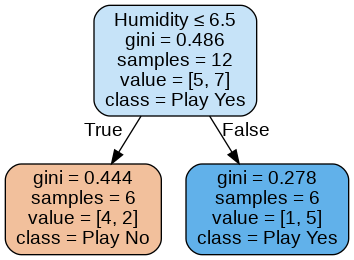

In [178]:
Image(dt_graph.create_png())

##**트리는 어떻게 예측을 만들어 내는가?**
맨 위 루트노드에서 부터 리프노드까지 살펴보면
처음 질문이 Humidity가 <= 6.5 인지를 물어보고 있다. Humidity <= 6.5를 먼저 물어본 이유는 불순도(불확실성)가 최대한 감소하는 방향으로 학습을 진행하기 때문이다.(정보획득)

여기서 Humidity가 <= 6.5 이면 왼쪽 자식노드로 이동하고 아니라면 오른쪽 자식노드로 이동한다.(여기서 매개변수를 
`max_depth=1`로 지정했기 때문에 질문은 하나이고 자식노드가 리프노드가 된다.) 

1) 루트노드
먼저 루트노드를 살펴보자
- gini= 0.486

: gini속성은 불순도(impurity)를 측정하는 지표로써 한 노드의 sample이 모두 같은 class에 속하면 0이된다. 

gini불순도를 구하는 방법은 다음과 같다.
G_I=1-∑_(k=1)^n▒p_(i,k)^2 

1-(5/12)^2-(7/12)^2 =  0.486
- samples = 12

총 14개의 sample 중 trainset가 12개이다.

- value = [5,7]

Play Yes 클래스로 분류된 sample이 12개 중에서 총 5개이고 NO가 7개이다.

- class = Play Yes

Humidity가 <= 6.5 이면 Play Yes로 분류한다.


(+) 사이킷런은 이진트리만 만드는 **CART알고리즘**을 사용한다. 따라서 **지니불순도** 값을 사용한다.
(+) 결정 트리는 **화이트 박스 모델**로 예측과정을 쉽게 확인할 수 있다는 장점이 있다. 